In [1]:
// Construct a Gaussian probability density model
RooRealVar x("x","x",0,-10,10) ;
RooRealVar mean("mean","Mean of Gaussian",0,-10,10) ;
RooRealVar width("width","With of Gaussian",3,0.1,10) ;
RooGaussian g("g","Gaussian",x, mean,width) ;

// Construct a Poisson probability model
RooRealVar n("n","Observed event cont",0,0,100) ;
RooRealVar mu("mu","Expected event count",10,0,100) ;
RooPoisson p("p","Poisson",n, mu) ;


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 mean         0.00000e+00  2.00000e+00   -1.00000e+01  1.00000e+01
     2 width        3.00000e+00  9.90000e-01    1.00000e-01  1.00000e+01
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **    6 **MIGRAD        1000           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE WHEN EDM .LT. 1.00e-03
 FCN=25056.1 FROM MIGRAD    STATUS=INITIATE       10 CALLS          11 TOTAL
                     EDM= unknown      STRATEGY= 1      NO ERROR MATRIX 

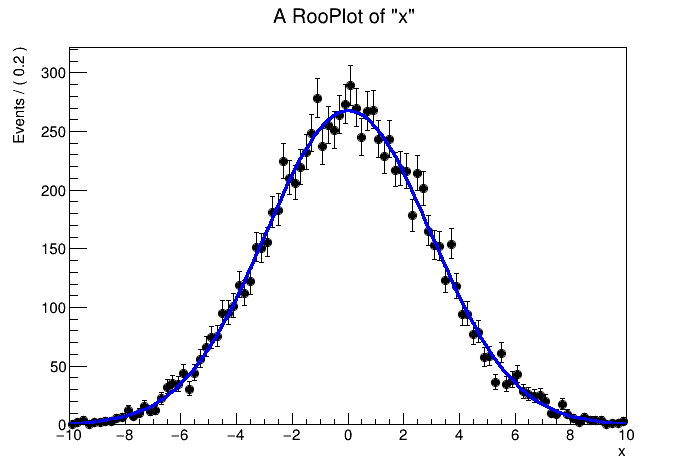

 COVARIANCE MATRIX CALCULATED SUCCESSFULLY
 FCN=25055.6 FROM HESSE     STATUS=OK             10 CALLS          43 TOTAL
                     EDM=7.27522e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                INTERNAL      INTERNAL  
  NO.   NAME      VALUE            ERROR       STEP SIZE       VALUE   
   1  mean         1.72335e-02   2.99542e-02   6.54778e-05   1.72335e-03
   2  width        2.98094e+00   2.17307e-02   2.11247e-05  -4.31233e-01
                               ERR DEF= 0.5
 EXTERNAL ERROR MATRIX.    NDIM=  25    NPAR=  2    ERR DEF=0.5
  8.973e-04  3.819e-07 
  3.819e-07  4.722e-04 
 PARAMETER  CORRELATION COEFFICIENTS  
       NO.  GLOBAL      1      2
        1  0.00059   1.000  0.001
        2  0.00059   0.001  1.000
[#1] INFO:Minization -- RooMinimizer::optimizeConst: deactivating const optimization


In [2]:
TCanvas* c1 = new TCanvas();
// generate unbnined dataset of 10k events
RooDataSet* toyData = g.generate(x,10000) ;

// Perform unbinned ML fit to toy data
g.fitTo(*toyData) ;

// Plot toy data and pdf in observable x
RooPlot* frame = x.frame() ;
toyData->plotOn(frame) ;
g.plotOn(frame) ;
frame->Draw() ;
c1->Draw() ;

In [3]:
c1->SaveAs("../docs/source/docs-fig01.png");

Info in <TCanvas::Print>: png file ../docs/source/docs-fig01.png has been created


 **********
 **   10 **SET PRINT           1
 **********
 **********
 **   11 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 mean         1.72335e-02  2.99542e-02   -1.00000e+01  1.00000e+01
     2 width        2.98094e+00  2.17307e-02    1.00000e-01  1.00000e+01
 **********
 **   12 **SET ERR         0.5
 **********
 **********
 **   13 **SET PRINT           1
 **********
 **********
 **   14 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **   15 **MIGRAD        1000           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE WHEN EDM .LT. 1.00e-03
 FCN=25055.6 FROM MIGRAD    STATUS=INITIATE        4 CALLS           5 TOTAL
                     EDM= unknown      STRATEGY= 1      NO ERROR MATRIX       
  EXT PARAMETER               CURRENT GUESS       STEP         FIRST   
  NO

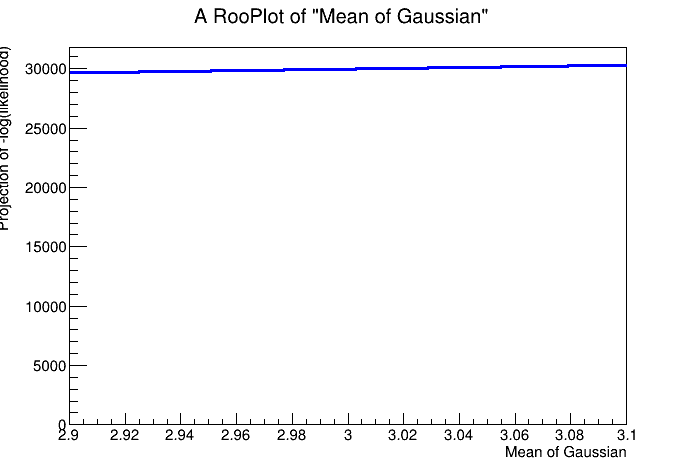

In [4]:
// Create Likelihood function L(x|mu,sigma) for all x in toy data
RooAbsReal* nll = g.createNLL(*toyData) ;

// ML estimation of model parameters mean,width
RooMinimizer m(*nll) ;
m.migrad() ; // Minimization
m.hesse() ; // Hessian error analysis

// Result of minimisation and error analysis is propagated to variabel objects representing model parameters
mean.Print() ;
width.Print() ;

// Visualize likelihood L(mu, sigma) at sigma = sigma_hat in range 2.9<mu<3.1
RooPlot* frame2 = mean.frame(2.9,3.1) ;
nll->plotOn(frame2) ;
frame2->Draw() ;
c1->Draw()

In [5]:
c1->SaveAs("../docs/source/docs-fig02.png");

Info in <TCanvas::Print>: png file ../docs/source/docs-fig02.png has been created
